# Fishbone Testing

In [1]:
import math
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow.keras as keras

from PIL import Image
from scipy import misc
from skimage import io,data,color
from tensorflow.keras import Input
from random import sample, choices
from skimage.transform import resize
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,BatchNormalization
%matplotlib inline

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
data = pd.read_csv('Datng.csv')
data_train,data_test=train_test_split(data,test_size=0.095,random_state=2,shuffle=False)

In [5]:
train_input = data_train.iloc[:,7:44]
train_output=data_train.iloc[:,0:7]
scaler_input =MinMaxScaler(feature_range=(0, 1))
train_input = scaler_input.fit_transform(train_input)
scaler_output =MinMaxScaler(feature_range=(0, 1))
train_output = scaler_output.fit_transform(train_output)

test_input = data_test.iloc[:,7:44]
test_output = data_test.iloc[:,0:7]
test_input = scaler_input.transform(test_input)
test_output = scaler_output.transform(test_output)
#test_input

In [6]:
model = keras.models.load_model('model_1116Ex4.h5')#Fishbone-inverse-ng-Trainning中训练完成的模型

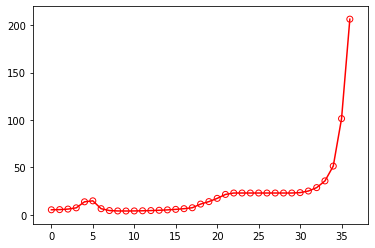

In [15]:
Ylabel = np.linspace(0.36,0.5,35)#固定平带ng值为23.079194420870493
test=[[5.395788880335429,
 5.5794101405961225,
 6.1226140510004115,
 7.445112837698906,
 13.802414217031899,
 14.824943445078228,
 6.549945715464304,
 4.590512859914472,
 4.169635085067721,
 4.109355353508606,
 4.183851176118043,
 4.340073227371999,
 4.569287068819105,
 4.8802006785693495,
 5.293028104770148,
 5.839463142676519,
 6.564698611599189,
 7.530136220442516,
 11.413192757058539,
 14.018653270905066,
 17.44063686731323,
 21.58949136754483,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.079194420870493,
 23.490030699232953,
 25.175576626439177,
 28.764333218655107,
 35.85805147348045,
 51.467034389424306,
 101.5109971133206,
 206.40528040432127]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

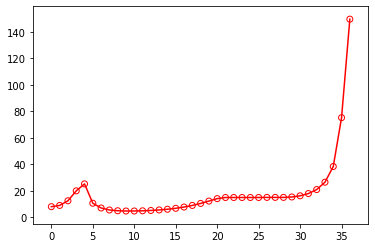

In [10]:
Ylabel = np.linspace(0.36,0.5,35)#固定平带ng值为15
test=[[8.077390513219033,
 9.010058129427968,
 12.529559379958899,
 20.01034690715146,
 25.25179721857018,
 10.673988892928977,
 7.087215580164964,
 5.5847188481478955,
 5.005674481209229,
 4.810687773800011,
 4.817838696824569,
 4.96150776991926,
 5.223396388882752,
 5.609403926216044,
 6.141693902845582,
 6.855549717358613,
 7.796273902043319,
 9.010398628768145,
 10.522725816206272,
 12.291592884582442,
 14.149246519413007,
 15,
 15,
 15,
 15,
 15,
 15.071514811104821,
 15.071514811104821,
 15.071514811104821,
 15.386324709447985,
 16.268066824950207,
 17.962143135043057,
 20.97869063218616,
 26.540000479943178,
 38.36352149078514,
 75.19734541802414,
 149.475074592972]]

test = np.array(test)
Nglabel = [420/i for i in Ylabel]
plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
plt.scatter(range(37),test.T,color='red',facecolors='none')

In [16]:
test_input=scaler_input.transform(test)
test_output=model.predict(test_input)
test_output=scaler_output.inverse_transform(test_output)
test_output

array([[0.6013246, 1.7610298, 0.871916 , 1.6870615, 0.529161 , 0.7858866,
        0.6768749]], dtype=float32)

In [ ]:
#0.67940813, 1.818417  , 0.8588093 , 1.6700937 , 0.49630237,
#        0.8064438 , 0.66929007 

In [ ]:
#0.74923986, 1.7318406 , 0.8547581 , 1.6903098 , 0.50433326,
#        0.7937883 , 0.7176311

In [9]:
fro=[#优化前1
 5.320605019152206,
 5.498166590683625,
 6.0113825536655785,
 7.167261541162934,
 11.62403968839003,
 16.39931146841008,
 8.014221548890715,
 4.9747909858033745,
 4.317256937396471,
 4.184389452667883,
 4.234292312938911,
 4.385954167176909,
 4.623742666958216,
 4.956831872394841,
 5.410772298891516,
 6.028413282545617,
 6.875727882243688,
 8.051146258452379,
 9.697025867522978,
 12.00557095418843,
 15.188804991853374,
 19.339564527584926,
 24.09247330148434,
 28.27550441631133,
 30.36835826299835,
 29.928073441811545,
 27.96418451606531,
 25.762129790040614,
 24.095303588374883,
 23.28749682274321,
 23.51226188255157,
 25.026523287112305,
 28.428442117420843,
 35.26175932381,
 50.356723963053874,
 98.47006671618206,
 197.21865238054187]

In [13]:
fro1=[#优化前2
 9.301545296140226,
 7.266912281756343,
 6.402619165053231,
 7.907673027594715,
 12.600288176407062,
 25.15342650936205,
 14.581424622567633,
 7.406673461809886,
 5.698520063552135,
 5.154244610170047,
 5.027394543393048,
 5.109637137149624,
 5.3379306438076615,
 5.702987544617113,
 6.224017219981415,
 6.943672462716438,
 7.931020483994069,
 9.28918317536961,
 11.163990993339707,
 13.742329895371398,
 17.20907799315004,
 21.591211803310983,
 26.43145286376174,
 30.52487312683049,
 32.464512214235405,
 31.920366608936074,
 29.88972036787243,
 27.630102581330256,
 25.918169876503203,
 25.102182742244214,
 25.38332298962698,
 27.052973751091486,
 30.774138377768185,
 38.24491487313018,
 54.80182699452438,
 108.20994500934029,
 221.0510662028353]

(0, 100)

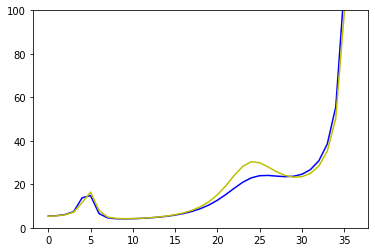

In [15]:
pre=[#预测值在MPB-PWE中的结果
 5.395788880335429,
 5.5794101405961225,
 6.1226140510004115,
 7.445112837698906,
 13.802414217031899,
 14.824943445078228,
 6.549945715464304,
 4.590512859914472,
 4.169635085067721,
 4.109355353508606,
 4.183851176118043,
 4.340073227371999,
 4.569287068819105,
 4.8802006785693495,
 5.293028104770148,
 5.839463142676519,
 6.564698611599189,
 7.530136220442516,
 8.814333418055025,
 10.505480232858739,
 12.67401655303816,
 15.307868259098337,
 18.210801570713667,
 20.9449125770191,
 22.965362593176597,
 23.962253054834118,
 24.081841711305547,
 23.773602503127123,
 23.515168984500573,
 23.690199423919285,
 24.628576585511986,
 26.744406616452636,
 30.798380905161203,
 38.576692795848004,
 55.557941126474915,
 110.15239483186926,
 226.1100489012984]

#plt.plot(range(37),test.T, c='r', linewidth = 1.5) 
#plt.scatter(range(37),test.T,color='red',facecolors='none')
plt.plot(range(37),pre, c='b', linewidth = 1.5) #预测/优化前对比
plt.plot(range(37),fro, c='y', linewidth = 1.5)
#plt.plot(range(37),fro1, c='r', linewidth = 1.5) 
#plt.scatter(range(37),pre,color='blue',facecolors='none')
plt.ylim(0,100)

In [21]:
OU = [i/xxx for i in test]#Max粗略归一化，xxx为每条曲线最大值
OU = np.array(OU)
OT = [i/xxx for i in pre]
OT = np.array(OT)

In [23]:
mse_test = np.sum((OU-OT)**2)/len(OT) 
mae_test = np.sum(np.absolute(OU-OT))/len(OT)
print('归一化MSE:{}'.format(mse_test))
print('归一化MAE:{}'.format(mae_test))

归一化MSE:0.0003122539865700256
归一化MAE:0.010663755155406017
